In [80]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Analysis for the Chevrolet Agile 2011 OBD 

### Read data

In [81]:
df= pd.read_csv("OBD'S/exp1_14drivers_14cars_dailyRoutes.csv")

# Set time index 
for i in range(df['TIMESTAMP'].__len__()):
    df['TIMESTAMP'][i]= df['TIMESTAMP'][i]/1000
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], unit='s')
df=df.set_index('TIMESTAMP')


C:\Users\Ahmed Medhat\AppData\Local\Temp\ipykernel_10416\3538133242.py:1: DtypeWarning: Columns (1,2,4,5,6,9,10,14,15,16,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("OBD'S/exp1_14drivers_14cars_dailyRoutes.csv")
C:\Users\Ahmed Medhat\AppData\Local\Temp\ipykernel_10416\3538133242.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TIMESTAMP'][i]= df['TIMESTAMP'][i]/1000


In [82]:
# Filter data to only chevrolet agile cars only
agile_df= df[df['VEHICLE_ID']=='car1']

agile_df

,MARK,MODEL,CAR_YEAR,ENGINE_POWER,AUTOMATIC,VEHICLE_ID,BAROMETRIC_PRESSURE(KPA),ENGINE_COOLANT_TEMP,FUEL_LEVEL,ENGINE_LOAD,...,THROTTLE_POS,DTC_NUMBER,TROUBLE_CODES,TIMING_ADVANCE,EQUIV_RATIO,MIN,HOURS,DAYS_OF_WEEK,MONTHS,YEAR
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2017-08-16 16:55:04.267000064,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%","33,30%",...,25%,MIL is OFF0 codes,NaN,"56,9%","1,0%",13.0,16.0,2.0,8.0,2017.0
2017-08-16 16:55:12.283000064,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%","32,50%",...,25%,MIL is OFF0 codes,NaN,"56,5%","1,0%",13.0,16.0,2.0,8.0,2017.0
2017-08-16 16:55:20.290999808,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%","32,90%",...,25%,MIL is OFF0 codes,NaN,"57,3%","1,0%",13.0,16.0,2.0,8.0,2017.0
2017-08-16 16:55:28.300000000,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%","32,50%",...,25%,MIL is OFF0 codes,NaN,"56,5%","1,0%",13.0,16.0,2.0,8.0,2017.0
2017-08-16 16:55:36.320000000,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%","32,90%",...,25%,MIL is OFF0 codes,NaN,"56,9%","1,0%",13.0,16.0,2.0,8.0,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-12 18:05:58.136000000,chevrolet,agile,2011.0,"1,4",n,car1,NaN,NaN,NaN,NaN,...,NaN,MIL is OFF0 codes,NaN,NaN,NaN,13.0,18.0,1.0,9.0,2017.0
2017-09-12 18:06:02.151000064,chevrolet,agile,2011.0,"1,4",n,car1,NaN,NaN,NaN,NaN,...,NaN,MIL is OFF0 codes,NaN,NaN,NaN,13.0,18.0,1.0,9.0,2017.0
2017-09-12 18:06:06.176999936,chevrolet,agile,2011.0,"1,4",n,car1,NaN,NaN,NaN,NaN,...,NaN,MIL is OFF0 codes,NaN,NaN,NaN,13.0,18.0,1.0,9.0,2017.0


In [83]:
df = df.dropna(subset = ['TROUBLE_CODES']).reset_index(drop=True) # getting rid of null values from trouble codes

In [84]:
new_car=df[df['VEHICLE_ID']== 'car6']
new_car['MARK']

0       volkswagen
1       volkswagen
2       volkswagen
3       volkswagen
4       volkswagen
           ...    
6065    volkswagen
6066    volkswagen
6067    volkswagen
6068    volkswagen
6069    volkswagen
Name: MARK, Length: 6070, dtype: object

## Quality Assessing


### Keys for Assessing Quality of data :

* **Completeness**  -> `What is missing or unusable` EX: Null values & Nan

* **Conformity** -> `What data is stored in non standarized format ` EX: Timestamps stored as "1502902504267"

* **Uniquiness** -> `What data measures or attributes are repeated`

* **Accuracy** -> `What data is incorrect or out of date`

* **Validity** -> `What data record is invalid ` EX : Employee name stored as " $4235s* "

* **Consistency** -> `What data values give conflict information` EX: Two different cars with the exact same data in features

* **Integrity** -> `What data(Primary Key) is missing invalid or not refrenced`

In [85]:
# Completence check 

# Check for missing values
missing_values = agile_df.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(agile_df)) * 100

# Print the missing values count and percentage for each column
print("\nMissing Values Percentage:")
print(missing_percentage)


Missing Values Percentage:
MARK                             0.000000
MODEL                            0.000000
CAR_YEAR                         0.000000
ENGINE_POWER                     0.000000
AUTOMATIC                        0.000000
VEHICLE_ID                       0.000000
BAROMETRIC_PRESSURE(KPA)        78.827936
ENGINE_COOLANT_TEMP             78.849967
FUEL_LEVEL                      79.026217
ENGINE_LOAD                     80.164500
AMBIENT_AIR_TEMP                87.089667
ENGINE_RPM                      80.142469
INTAKE_MANIFOLD_PRESSURE        78.849967
MAF                             80.142469
LONG TERM FUEL TRIM BANK 2      21.260189
FUEL_TYPE                        0.000000
AIR_INTAKE_TEMP                 78.849967
FUEL_PRESSURE                  100.000000
SPEED                            0.161563
SHORT TERM FUEL TRIM BANK 2     21.267533
SHORT TERM FUEL TRIM BANK 1     21.267533
ENGINE_RUNTIME                  79.848719
THROTTLE_POS                    78.769186
DTC_NU

In [86]:
# Conformity Check

# Check for duplicate rows
duplicate_rows = agile_df.duplicated()
duplicate_rows_count = duplicate_rows.sum()

# Check for inconsistent values within columns
inconsistent_values = []
for column in agile_df.columns:
    unique_values = agile_df[column].unique()
    if len(unique_values) > 1:
        print(column)
        inconsistent_values.append(column)


# Calculate the Duplicate percentage 
duplicate_percentage = (duplicate_rows_count / len(agile_df)) * 100

# Print the results
# print("Duplicate Rows Count:", duplicate_rows_count)
# print("Total Rows:",agile_df.__len__())
print("Duplicate Rows Percentage =", duplicate_percentage )
print("Inconsistent Columns:", inconsistent_values)

BAROMETRIC_PRESSURE(KPA)
ENGINE_COOLANT_TEMP
FUEL_LEVEL
ENGINE_LOAD
AMBIENT_AIR_TEMP
ENGINE_RPM
INTAKE_MANIFOLD_PRESSURE
MAF
LONG TERM FUEL TRIM BANK 2
AIR_INTAKE_TEMP
SPEED
SHORT TERM FUEL TRIM BANK 2
SHORT TERM FUEL TRIM BANK 1
ENGINE_RUNTIME
THROTTLE_POS
DTC_NUMBER
TIMING_ADVANCE
EQUIV_RATIO
MIN
HOURS
DAYS_OF_WEEK
MONTHS
Duplicate Rows Percentage = 79.26121759565248
Inconsistent Columns: ['BAROMETRIC_PRESSURE(KPA)', 'ENGINE_COOLANT_TEMP', 'FUEL_LEVEL', 'ENGINE_LOAD', 'AMBIENT_AIR_TEMP', 'ENGINE_RPM', 'INTAKE_MANIFOLD_PRESSURE', 'MAF', 'LONG TERM FUEL TRIM BANK 2', 'AIR_INTAKE_TEMP', 'SPEED', 'SHORT TERM FUEL TRIM BANK 2', 'SHORT TERM FUEL TRIM BANK 1', 'ENGINE_RUNTIME', 'THROTTLE_POS', 'DTC_NUMBER', 'TIMING_ADVANCE', 'EQUIV_RATIO', 'MIN', 'HOURS', 'DAYS_OF_WEEK', 'MONTHS']


## Observation

The dataset has got alot of noise reaching `80%` in some Columns

## Approach 

We will filter out the rows containing more than 1 missing values and fill missing values wih forward and bachward fill 


### Q: Why ffill & bfill ?

A: Timestamps data often exhibits trends, patterns, or dependencies over time. By filling missing values with nearby observed values using bfill or ffill, the general trend and pattern in the data are preserved to some extent. 

In [87]:
# First we select columns that has important features 

cleaned_df = agile_df[['BAROMETRIC_PRESSURE(KPA)','ENGINE_COOLANT_TEMP','FUEL_LEVEL','ENGINE_LOAD','AMBIENT_AIR_TEMP','ENGINE_RPM','INTAKE_MANIFOLD_PRESSURE','MAF','AIR_INTAKE_TEMP','SPEED','ENGINE_RUNTIME','THROTTLE_POS','DTC_NUMBER','TIMING_ADVANCE']]

cleaned_df.tail()

,BAROMETRIC_PRESSURE(KPA),ENGINE_COOLANT_TEMP,FUEL_LEVEL,ENGINE_LOAD,AMBIENT_AIR_TEMP,ENGINE_RPM,INTAKE_MANIFOLD_PRESSURE,MAF,AIR_INTAKE_TEMP,SPEED,ENGINE_RUNTIME,THROTTLE_POS,DTC_NUMBER,TIMING_ADVANCE
TIMESTAMP,,,,,,,,,,,,,,
2017-09-12 18:05:58.136000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,MIL is OFF0 codes,NaN
2017-09-12 18:06:02.151000064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,MIL is OFF0 codes,NaN
2017-09-12 18:06:06.176999936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,MIL is OFF0 codes,NaN
2017-09-12 18:06:10.201999872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,MIL is OFF0 codes,NaN
2017-09-12 18:06:14.213999872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,MIL is OFF0 codes,NaN


In [88]:
# Count the number of null or missing values in each row
null_counts = cleaned_df.isnull().sum(axis=1)

# Filter rows with more than 1 null or missing values
filtered_df = cleaned_df[null_counts <= 1]

# Print the resulting DataFrame
print(filtered_df,filtered_df.__len__())

                               BAROMETRIC_PRESSURE(KPA)  ENGINE_COOLANT_TEMP  \
TIMESTAMP                                                                      
2017-08-16 16:55:04.267000064                     100.0                 80.0   
2017-08-16 16:55:12.283000064                     100.0                 80.0   
2017-08-16 16:55:20.290999808                     100.0                 80.0   
2017-08-16 16:55:28.300000000                     100.0                 80.0   
2017-08-16 16:55:36.320000000                     100.0                 80.0   
...                                                 ...                  ...   
2017-09-12 16:25:20.346999808                     100.0                 81.0   
2017-09-12 16:25:29.188000000                     100.0                 81.0   
2017-09-12 16:25:37.208000000                     100.0                 81.0   
2017-09-12 16:25:48.374000128                     100.0                 82.0   
2017-09-12 16:25:57.986000128           

## Data cleaning

In [89]:
filtered_df.__len__()

2667

In [90]:
# Remove Nan values 

filtered_df.fillna(method='ffill',inplace=True)
filtered_df.fillna(method='bfill',inplace=True)

# Remove the percentage symbol and convert to numeric values
filtered_df['THROTTLE_POS'] = cleaned_df['THROTTLE_POS'].str.rstrip('%').astype(float)
filtered_df['ENGINE_LOAD'] = cleaned_df['ENGINE_LOAD'].str.rstrip('%').str.replace(',', '.').astype(float)
filtered_df['FUEL_LEVEL'] = cleaned_df['FUEL_LEVEL'].str.rstrip('%').str.replace(',', '.').astype(float)

C:\Users\Ahmed Medhat\AppData\Local\Temp\ipykernel_10416\1144138096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.fillna(method='ffill',inplace=True)
C:\Users\Ahmed Medhat\AppData\Local\Temp\ipykernel_10416\1144138096.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.fillna(method='bfill',inplace=True)
C:\Users\Ahmed Medhat\AppData\Local\Temp\ipykernel_10416\1144138096.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [91]:
filtered_df.isna().sum()

BAROMETRIC_PRESSURE(KPA)    0
ENGINE_COOLANT_TEMP         0
FUEL_LEVEL                  0
ENGINE_LOAD                 2
AMBIENT_AIR_TEMP            0
ENGINE_RPM                  0
INTAKE_MANIFOLD_PRESSURE    0
MAF                         0
AIR_INTAKE_TEMP             0
SPEED                       0
ENGINE_RUNTIME              0
THROTTLE_POS                0
DTC_NUMBER                  0
TIMING_ADVANCE              0
dtype: int64

In [92]:
filtered_df.__len__()

2667

## Data Analysis

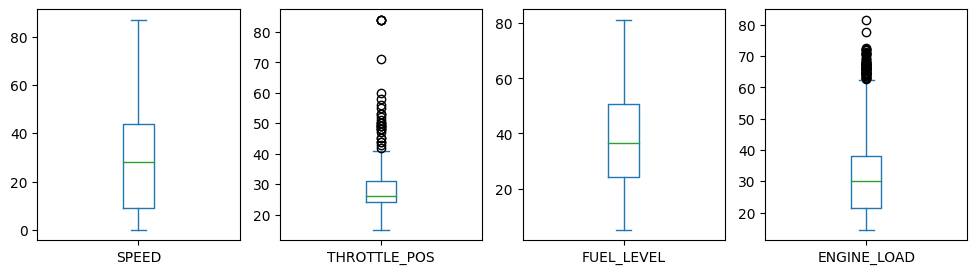

In [94]:
select = ['ENGINE_RPM','SPEED','THROTTLE_POS','FUEL_LEVEL','ENGINE_LOAD','ENGINE_RPM']

filtered_df[select].plot(kind='box',subplots=True,figsize=(12,3))
plt.show()

In [96]:
filtered_df

,BAROMETRIC_PRESSURE(KPA),ENGINE_COOLANT_TEMP,FUEL_LEVEL,ENGINE_LOAD,AMBIENT_AIR_TEMP,ENGINE_RPM,INTAKE_MANIFOLD_PRESSURE,MAF,AIR_INTAKE_TEMP,SPEED,ENGINE_RUNTIME,THROTTLE_POS,DTC_NUMBER,TIMING_ADVANCE
TIMESTAMP,,,,,,,,,,,,,,
2017-08-16 16:55:04.267000064,100.0,80.0,48.6,33.3,16.0,1009.0,49.0,"4,49",59.0,0.0,00:03:28,25.0,MIL is OFF0 codes,"56,9%"
2017-08-16 16:55:12.283000064,100.0,80.0,48.6,32.5,16.0,1003.0,52.0,"4,51",59.0,0.0,00:03:35,25.0,MIL is OFF0 codes,"56,5%"
2017-08-16 16:55:20.290999808,100.0,80.0,48.6,32.9,16.0,995.0,51.0,"4,48",59.0,0.0,00:03:43,25.0,MIL is OFF0 codes,"57,3%"
2017-08-16 16:55:28.300000000,100.0,80.0,48.6,32.5,16.0,1004.0,51.0,"4,51",60.0,0.0,00:03:51,25.0,MIL is OFF0 codes,"56,5%"
2017-08-16 16:55:36.320000000,100.0,80.0,48.6,32.9,16.0,1005.0,49.0,"4,49",60.0,0.0,00:03:59,25.0,MIL is OFF0 codes,"56,9%"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-12 16:25:20.346999808,100.0,81.0,25.1,24.7,32.0,1154.0,66.0,"3,97",48.0,14.0,00:10:58,24.0,MIL is OFF0 codes,"65,5%"
2017-09-12 16:25:29.188000000,100.0,81.0,25.1,27.1,32.0,1449.0,37.0,"5,64",49.0,20.0,00:11:09,26.0,MIL is OFF0 codes,"69,8%"
2017-09-12 16:25:37.208000000,100.0,81.0,24.7,16.1,32.0,1539.0,39.0,"3,62",50.0,12.0,00:11:18,23.0,MIL is OFF0 codes,"74,5%"


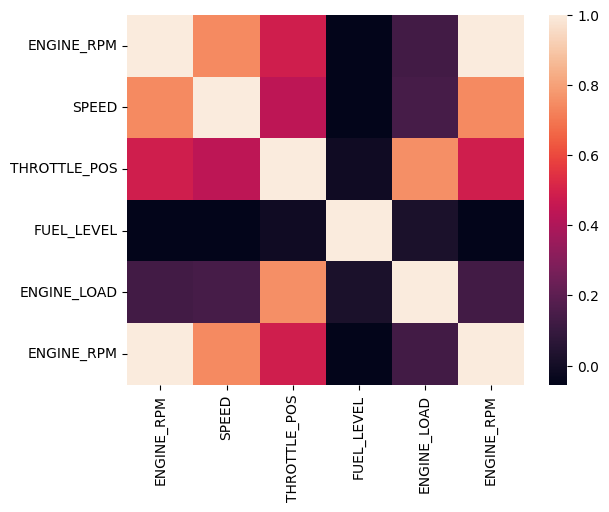

In [97]:
# Heatmap is very effecient in finding collerations between features

sns.heatmap(filtered_df[select].corr())
plt.show()

## Heatmap analysis 

* It's clear from the heatmap that some features are highly collerated with each other ex => **Speed** - **Engine rpm**
* And some are somewhat collerated ex => **Engine load** - **Throttle position**
* And some are very distinct ex => **Fuel level** - **Engine Load**

                                                                                           

#### This is a full analysis profile made with pandas which is very helpful in gaining insights from a dataset

In [98]:
# from pandas_profiling import ProfileReport

# profile = ProfileReport(cleaned_df, explorative=True, minimal =False)
# try:
#     profile.to_widgets()
# except:
#     profile.to_notebook_iframe()

# profile.to_file('chev.html')    

## DTC codes analysis 
The *cheverolet agile* didn't have any DTC codes so we made analysis on another car with a punch of DTC codes which is the **volkswagen polo**

In [99]:
# Select polo rows only 
polo_df = df[df['VEHICLE_ID']=='car6']
polo_df.head()

,MARK,MODEL,CAR_YEAR,ENGINE_POWER,AUTOMATIC,VEHICLE_ID,BAROMETRIC_PRESSURE(KPA),ENGINE_COOLANT_TEMP,FUEL_LEVEL,ENGINE_LOAD,...,THROTTLE_POS,DTC_NUMBER,TROUBLE_CODES,TIMING_ADVANCE,EQUIV_RATIO,MIN,HOURS,DAYS_OF_WEEK,MONTHS,YEAR
0,volkswagen,polo,2006.0,"1,6",n,car6,NaN,42.0,NaN,"6,30%",...,4%,MIL is OFF1 codes,P0133,"71,4%",NaN,53.0,18.0,5.0,7.0,2017.0
1,volkswagen,polo,2006.0,"1,6",n,car6,NaN,42.0,NaN,"6,70%",...,4%,MIL is OFF1 codes,P0133,"69,0%",NaN,53.0,18.0,5.0,7.0,2017.0
2,volkswagen,polo,2006.0,"1,6",n,car6,NaN,43.0,NaN,"7,50%",...,4%,MIL is OFF1 codes,P0133,"50,6%",NaN,53.0,18.0,5.0,7.0,2017.0
3,volkswagen,polo,2006.0,"1,6",n,car6,NaN,44.0,NaN,"5,50%",...,4%,MIL is OFF1 codes,P0133,"53,7%",NaN,53.0,18.0,5.0,7.0,2017.0
4,volkswagen,polo,2006.0,"1,6",n,car6,NaN,45.0,NaN,"5,10%",...,3%,MIL is OFF1 codes,P0133,"54,1%",NaN,53.0,18.0,5.0,7.0,2017.0


In [100]:
# Extract the codes

DTC_codes=polo_df['TROUBLE_CODES'].unique()
DTC_codes

array(['P0133'], dtype=object)

It seems that Polo has only one DTC code let's break it down *(P0133)* :

- *"P0"*  indicates that it is a generic powertrain code.
- *"1"*  refers to the specific area of the vehicle where the issue is detected. In this case, it is related to the fuel and air metering, which typically involves the oxygen sensor.
- *"33"* specifies the specific fault or error within that area. In this case, it indicates a problem with the oxygen sensor circuit or a slow response from the sensor.

### In conclusion : 
The P0133 code specifically indicates that there is a malfunction or low voltage condition detected in the downstream oxygen sensor (Bank 1, Sensor 1) of the vehicle. The downstream sensor is located after the catalytic converter and is responsible for monitoring the oxygen content in the exhaust gases.

----------------------------

# Engine Performance Evaluation 
In this section we will use Linear regression to Evaluate The performance of the engine BUT before looking at the code let's address the reasons for choosing the training features 


-------------------------------------------------

### First, why MAF as the metric for evaluating engine performance 
`A`: Mass airflow sensor (MAF) measures the amount of air entering the engine and there are several reasons on why it evaluates engine performance

In [120]:
# preprocess MAF datatype
filtered_df['MAF'] = filtered_df['MAF'].str.replace(',', '.').astype(float)

C:\Users\Ahmed Medhat\AppData\Local\Temp\ipykernel_10416\3933526403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['MAF'] = filtered_df['MAF'].str.replace(',', '.').astype(float)


In [110]:
has_nan = np.isnan(filtered_df['THROTTLE_POS']).any()

# Print the result
if has_nan:
    print(f"The column '{'THROTTLE_POS'}' has NaN values.")
else:
    print(f"The column '{'THROTTLE_POS'}' does not have NaN values.")

The column 'ENGINE_LOAD' does not have NaN values.


In [113]:
np.isnan(filtered_df['ENGINE_LOAD'])

TIMESTAMP
2017-08-16 16:55:04.267000064    False
2017-08-16 16:55:12.283000064    False
2017-08-16 16:55:20.290999808    False
2017-08-16 16:55:28.300000000    False
2017-08-16 16:55:36.320000000    False
                                 ...  
2017-09-12 16:25:20.346999808    False
2017-09-12 16:25:29.188000000    False
2017-09-12 16:25:37.208000000    False
2017-09-12 16:25:48.374000128    False
2017-09-12 16:25:57.986000128    False
Name: ENGINE_LOAD, Length: 2667, dtype: bool

In [119]:
filtered_df['ENGINE_LOAD'].dtype

dtype('float64')

In [115]:
#Forward fill NaN values
filtered_df['ENGINE_LOAD'].fillna(method='ffill', inplace=True)

C:\Users\Ahmed Medhat\AppData\Local\Temp\ipykernel_10416\184224927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ENGINE_LOAD'].fillna(method='ffill', inplace=True)


In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
# Select the columns for the independent variables
X = filtered_df[['ENGINE_COOLANT_TEMP', 'ENGINE_RPM',
       'AIR_INTAKE_TEMP', 'ENGINE_LOAD', 'THROTTLE_POS']]

# Select the column for the dependent variable
y = filtered_df['MAF']

# Split the data into a training set and a test set 
# I did a 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit a linear regression model to the data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2, "\n")
# Create a DataFrame to store the actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the first 20 rows of the results DataFrame
print(results.head(20))

Mean Squared Error: 1.571713922259516
R^2 Score: 0.9255090235775308 

                               Actual  Predicted
TIMESTAMP                                       
2017-08-31 22:06:29.523000064   18.18  15.725922
2017-08-16 20:10:40.431000064    3.55   2.396122
2017-08-27 19:18:46.865999872    9.41   9.775436
2017-08-31 22:19:35.155000064    4.34   4.542829
2017-08-21 23:56:46.112000000    7.19   7.829194
2017-09-01 23:30:53.071000064   11.21  11.375468
2017-08-16 20:28:51.648000000    4.20   4.091180
2017-08-16 20:14:01.799000064   11.42  11.625167
2017-09-01 23:27:49.053999872    3.63   3.770180
2017-09-11 15:06:08.931000064    4.39   4.380703
2017-08-24 16:33:46.526000128    3.37   2.866292
2017-08-21 21:50:26.792000000    9.89  10.938427
2017-08-16 20:09:04.214999808    3.22   2.224548
2017-08-21 21:29:51.608000000    4.45   4.322381
2017-08-24 22:16:49.175000064    5.89   5.683543
2017-08-21 23:56:22.055000064   10.98  12.380215
2017-08-27 19:16:12.926000128    4.26   4.059829

## Results  

As seen the mean squared error is very low wich indicates that the regression is highly accurate 